In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-steal_attempt.csv")

df = pd.concat((pd.read_csv(f, dtype={"is_strike": "boolean"}) for f in all_files), ignore_index=True)

season = 13
# df = df[df["season"] == season]
len(df)

129511

In [2]:
def calc_vibes(df, prefix):
    buoy = df[prefix + "_buoyancy"]
    press = df[prefix + "_pressurization"]
    cinn = df[prefix + "_cinnamon"]

    freq = 6 + (buoy * 10).round()
    phase = math.pi * ((2 / freq) * dfc["day"] + 0.5)
    vibes = 0.5 * (press + cinn) * np.sin(phase) - (0.5 * press) + (0.5 * cinn)
    return vibes


def get_pitcher_mul(row):
    pm = str(row["pitcher_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in pm:
        mul += 0.2
    if "OVERPERFORMING" in ptm:
        mul += 0.2
    if "UNDERPERFORMING" in pm:
        mul -= 0.2
    if "UNDERPERFORMING" in ptm:
        mul -= 0.2
    if "TRAVELING" in ptm:
        # pass # traveling just doesn't do anything on pitchers?
        if not row["top_of_inning"]:
            mul += 0.05
    if "HIGH_PRESSURE" in ptm:
        # i messed up baserunner_count lol, so it's a string
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "GROWTH" in ptm:
        mul += min(0.05, 0.05 * (row["day"] / 99))
        # pass # growth doesn't do anything on pitchers either
    if "SINKING_SHIP" in ptm:
        mul += (14 - row["pitching_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in ptm and row["weather"] == 11:
        mul += 0.5
    return mul


def get_batter_mul(row):
    bm = str(row["batter_mods"])
    btm = str(row["batting_team_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in bm:
        mul += 0.2
    if "OVERPERFORMING" in btm:
        mul += 0.2
    if "UNDERPERFORMING" in bm:
        mul -= 0.2
    if "UNDERPERFORMING" in btm:
        mul -= 0.2
    if "TRAVELING" in btm:
        pass
        # if row["top_of_inning"]:
        # this doesn't seem to do anything if it's here or not here
        # mul += 0.05
    if "GROWTH" in btm:
        # mul += min(0.05, 0.05 * (row["day"] / 99))
        pass
    if "HIGH_PRESSURE" in btm:
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "SINKING_SHIP" in btm:
        mul += (14 - row["batting_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in btm and row["weather"] == 11:
        mul += 0.5
    if "CHUNKY" in bm and row["weather"] == 10:
        # todo: handle, in peanuts weather
        #         pass
        mul += 1.0
    if "SMOOTH" in bm and row["weather"] == 10:
        # todo: handle, in peanuts weather
        pass
    if "ON_FIRE" in bm:
        # todo: handle
        mul += 2.0
    #         pass
    return mul


def get_fielder_mul(row):
    fm = str(row["fielder_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in fm:
        mul += 0.2
    if "OVERPERFORMING" in ptm:
        mul += 0.2
    if "UNDERPERFORMING" in fm:
        mul -= 0.2
    if "UNDERPERFORMING" in ptm:
        mul -= 0.2
    if "TRAVELING" in ptm:
        # pass # traveling just doesn't do anything on pitchers?
        if not row["top_of_inning"]:
            mul += 0.05
    if "HIGH_PRESSURE" in ptm:
        # i messed up baserunner_count lol, so it's a string
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "GROWTH" in ptm:
        mul += min(0.05, 0.05 * (row["day"] / 99))
        # pass # growth doesn't do anything on pitchers either
    if "SINKING_SHIP" in ptm:
        mul += (14 - row["pitching_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in ptm and row["weather"] == 11:
        mul += 0.5
    if "SHELLED" in fm:
        # is it this, or is it "mul = 0", I wonder
        mul -= 1.0
    return mul

In [3]:
df["batter_mul"] = df.apply(get_batter_mul, axis=1)
df["pitcher_mul"] = df.apply(get_pitcher_mul, axis=1)
df["fielder_mul"] = df.apply(get_fielder_mul, axis=1)

In [4]:
# df["baserunner_n"] = [int(np.floor(len(x) / 40)) for x in df.loc[:, "baserunner_count"]]

df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0

for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_mul"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])
df = df.copy()
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_mul"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

if "fielder_vibes" in df:
    for attr in [
        "fielder_anticapitalism",
        "fielder_chasiness",
        "fielder_omniscience",
        "fielder_tenaciousness",
        "fielder_watchfulness",
    ]:
        df[attr] = df[attr] * df["fielder_mul"]
        df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

df["cold_runners"] = df["pitcher_coldness_with_vibe"] * (0 + df["baserunner_count"])
df["laser_thirst"] = df["batter_laserlikeness_with_vibe"] * df["batter_base_thirst_with_vibe"]
df = df.copy()

In [5]:
df.groupby("event_type").size().sort_values(ascending=False)[0:15]

event_type
StealAttempt0    64640
StealAttempt1    33036
StealAttempt2    31835
dtype: int64

In [6]:
dfc = df[df["event_type"] == "StealAttempt0"].copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
# for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
# for exclude_mod in ["SPICY", "ON_FIRE"]:
# dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
#  dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
#  dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
#  dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]


dfc = dfc[(dfc["pitcher_mul"] == 1) & (dfc["batter_mul"] == 1)]

# dfc = dfc[dfc['stadium_id'].isna()]

len(dfc)

54026

In [7]:
dfc.groupby("event_type").size().sort_values(ascending=False)

event_type
StealAttempt0    54026
dtype: int64

In [8]:
X = dfc[
    [
        "roll",
        "passed",
        # "batter_base_thirst_with_vibe",
        # "batter_laserlikeness_with_vibe",
        "pitcher_watchfulness_with_vibe",
        # "pitcher_coldness_with_vibe",
        "laser_thirst",
        # "cold_runners",
        # "fielder_omniscience_with_vibe",
        # 'fielder_tenaciousness_with_vibe',
        "fielder_watchfulness_with_vibe",
        # "fielder_watchfulness",
        # "fielder_anticapitalism_with_vibe",
        # 'fielder_chasiness_with_vibe',
        # "ballpark_grandiosity",
        # 'ballpark_fortification',
        # "ballpark_obtuseness",
        # 'ballpark_ominousness',
        "ballpark_inconvenience",
        # "ballpark_viscosity",
        # "ballpark_forwardness",
        # 'ballpark_elongation',
        # 'ballpark_mysticism',
        # 'ballpark_filthiness',
    ]
]
# X = X[X['roll'] < 0.85]

y = X["passed"]
X = X.drop("passed", axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=1000000, C=1000000, tol=1e-10).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[51453   175]
 [  205  2193]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     51628
        True       0.93      0.91      0.92      2398

    accuracy                           0.99     54026
   macro avg       0.96      0.96      0.96     54026
weighted avg       0.99      0.99      0.99     54026

0.9929663495354089


In [10]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.04391782]


[(1.0, 'roll'),
 (-0.1341985699311073, 'laser_thirst'),
 (0.059552263266003734, 'pitcher_watchfulness_with_vibe'),
 (0.019813326201701637, 'fielder_watchfulness_with_vibe'),
 (0.018671853060072977, 'ballpark_inconvenience')]

## Best formulas so far

[0.04391782]
(-0.059552263266003734, 'pitcher_watchfulness_with_vibe')
(0.1341985699311073, 'laser_thirst')
(-0.019813326201701637, 'fielder_watchfulness_with_vibe')
(-0.018671853060072977, 'ballpark_inconvenience')


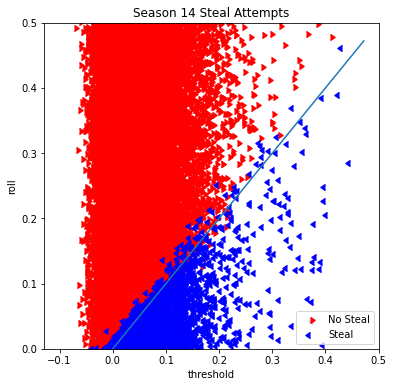

In [11]:
# dfc["threshold"] = 0.315 - (
#     -0.10 * dfc["batter_thwackability_with_vibe"]
#     + 0.08 * dfc["pitcher_unthwackability_with_vibe"]
#     + 0.07 * dfc["fielder_omniscience_with_vibe"]
# )  # this works for season 12 and 13 without ballparks

# this will use the fit values
dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]


y_val = "roll"
x_val = "threshold"
# x_val = "fielder_watchfulness_with_vibe"
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]][y_val],
    color="red",
    label="No Steal",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]][y_val],
    color="blue",
    label="Steal",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title(f"Season {season+1} Steal Attempts")
# ax.set_xlim(0.484, 0.499)
ax.set_ylim(0, 0.5)

if x_val == "threshold":
    ax.plot(ax.get_xlim(), ax.get_xlim())

ax.legend()

In [12]:
# outliers.sort_values('roll', ascending=True).style.hide()
dfc.groupby("fielder_name").size().sort_values(ascending=False)[0:5]

fielder_name
Eduardo Woodman       449
Farrell Seagull       425
Basilio Mason         422
Basilio Fig           418
Halexandrey Walton    411
dtype: int64

380


,offset,event_type,pitcher_mul,batter_mul,fielder_mul,event_type,roll,threshold,batter_thwackability_with_vibe,pitcher_unthwackability_with_vibe,fielder_omniscience_with_vibe,batter_name,pitcher_name,fielder_name,batter_mods,pitcher_mods,fielder_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count,fielder_roll,ballpark_obtuseness
23179,0.053399,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.251664,0.198264,0.718361,1.178882,0.908809,Collins Melon,Famous Owens,Aldon Cashmoney,ALTERNATE,TRIPLE_THREAT,SPICY;EGO2,NaN,FIREPROOF;SEALANT;AMBUSH,83,cb4ed778-0ebb-40c8-a5f8-66621c0c7e90,161,0.073427,0.437936
22237,0.043416,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.188160,0.144744,0.846322,0.972911,0.584073,Richardson Games,Doc Anice,Jaxon B-ck-ey,FLINCH;SIPHON,NaN,FIRE_EATER;SCATTERED,TRAVELING,AFFINITY_FOR_CROWS,82,6d12517b-04e7-4344-a214-4bd642f234d5,168,0.493621,0.473072
101626,0.040706,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.136149,0.095442,1.024883,1.204082,1.157480,Aldon Cashmoney,Enid Marlow,Scratch Deleuze,SPICY;EGO1,NaN,NaN,FIREPROOF;SEALANT;AMBUSH,BOTTOM_DWELLER,18,686aa24f-4f10-42a2-95d2-a50d679fd74d,245,0.231109,0.598174
20674,0.039053,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.315183,0.276130,0.779135,0.905772,0.989860,Collins Melon,Flattery McKinley,Slosh Truk,ALTERNATE,ALTERNATE,NaN,NaN,UNDERSEA,80,24a4c7bc-871a-46da-9119-27d05e661dd0,280,0.422702,0.533075
128455,0.038032,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.000184,-0.037848,0.605121,1.003844,0.937200,Bonk Jokes,Ruslan Greatness,Lang Richardson,NaN,FRIEND_OF_CROWS,NaN,O_NO,AFFINITY_FOR_CROWS,104,bf090bfc-0b4b-4654-bd85-f2ec3123341d,128,0.741687,0.626709
113554,0.036728,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.028028,-0.008700,1.100036,0.812591,1.006532,Scratch Deleuze,Gerund Pantheocide,Stijn Strongbody,NaN,NaN,SWIM_BLADDER,BOTTOM_DWELLER,NaN,36,6b9835ed-8454-41c3-ad57-e6db766fadea,12,0.297360,0.668717
68683,0.032896,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.197521,0.164624,1.163298,0.875268,0.725404,Aldon Cashmoney,Liam Snail,R-l-- Fir-----,SPICY;EGO2,NaN,SCATTERED,FIREPROOF;SEALANT;AMBUSH,LIFE_OF_PARTY;ELECTRIC,43,c8148ec0-3862-4f0a-a4e8-3399af5ef500,95,0.200311,0.436212
5402,0.031110,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.369851,0.338741,1.005100,0.801072,0.611466,Goodwin Morin,Kathy Mathews,Tamara Crankit,EGO1,ALTERNATE,NaN,NaN,EARLBIRDS,86,82f9920a-1768-474f-9fab-65d380e78a1f,129,0.167585,0.437936
36043,0.030966,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.199607,0.168641,0.846322,0.780800,0.215193,Richardson Games,Frankie Hambone,Erin Jesaulenko,FLINCH;SIPHON,NaN,NaN,TRAVELING;PARTY_TIME,UNDERSEA;PARTY_TIME,98,0aa21834-6d27-4e44-94d8-c62d93547920,86,0.998411,0.533075
368,0.030554,StealAttempt0,1.0,1.0,1.0,StealAttempt0,0.310743,0.280189,0.819542,0.934024,0.475705,Forrest Best,James Mora,Washer Barajas,FLINCH,NaN,NaN,CARCINIZATION;UNHOLEY,O_NO,80,d45c8ef8-3cda-4b95-bfb8-67ebf3404f8d,287,0.001345,0.669207


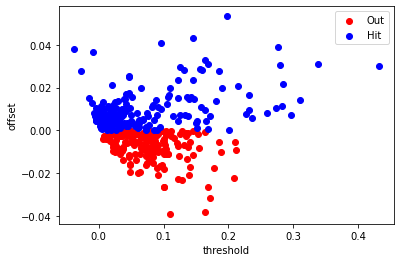

In [13]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "threshold"
# x_val = "pitcher_unthwackability_with_vibe"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="Out",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Hit",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
table = outliers[
    [
        "offset",
        "event_type",  # "home_score", "away_score", "top_of_inning", "inning",
        "pitcher_mul",
        "batter_mul",
        "fielder_mul",  # "baserunner_count",
        "event_type",
        "roll",
        "threshold",  # "batter_vibes", "pitcher_vibes",
        "batter_thwackability_with_vibe",
        "pitcher_unthwackability_with_vibe",
        "fielder_omniscience_with_vibe",
        "batter_name",
        "pitcher_name",
        "fielder_name",
        "batter_mods",
        "pitcher_mods",
        "fielder_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "day",
        "game_id",
        "play_count",
        "fielder_roll",
        "ballpark_obtuseness",
    ]
]
print(len(table))
table.sort_values("offset", ascending=False)[0:10]

In [14]:
dfc.corr()["offset"].sort_values()[0:10]

passed                              -0.370359
threshold                           -0.173286
laser_thirst                        -0.162200
batter_laserlikeness_with_vibe      -0.121838
batter_base_thirst_with_vibe        -0.119022
batter_laserlikeness                -0.114494
batter_base_thirst                  -0.110929
batter_watchfulness_with_vibe       -0.066737
batter_shakespearianism_with_vibe   -0.066420
batter_ground_friction_with_vibe    -0.062100
Name: offset, dtype: float64

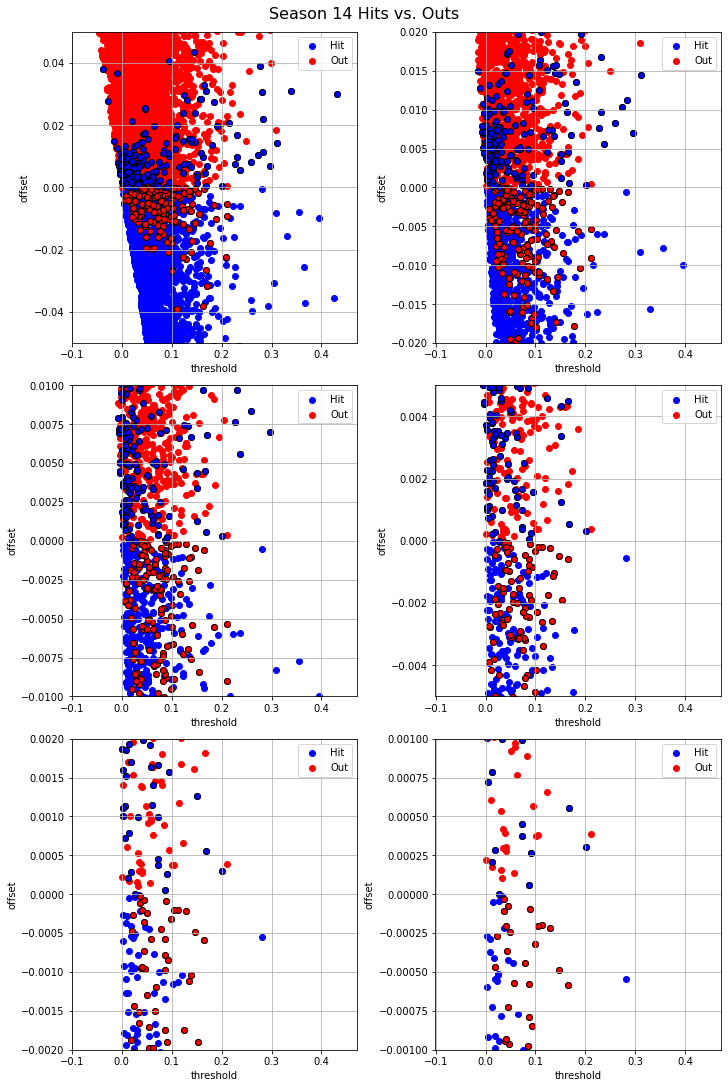

In [15]:
plt.rcParams["font.size"] = 10
x_val = "threshold"
fig, axes = plt.subplots(3, 2, figsize=(10, 15), constrained_layout=True)
fig.suptitle(f"Season {season+1} Hits vs. Outs", fontsize=16)
dimlist = [5e-2, 2e-2, 1e-2, 0.5e-2, 0.2e-2, 0.1e-2]
for i, ax in enumerate(np.ravel(axes)):
    ax.scatter(
        dfc[dfc["passed"]][x_val],
        dfc[dfc["passed"]]["offset"],
        color="blue",
        label="Hit",
    )
    ax.scatter(
        dfc[~dfc["passed"]][x_val],
        dfc[~dfc["passed"]]["offset"],
        color="red",
        label="Out",
    )
    ax.scatter(
        outliers[~outliers["passed"]][x_val],
        outliers[~outliers["passed"]]["offset"],
        color="red",
        edgecolor="black",
    )
    ax.scatter(
        outliers[outliers["passed"]][x_val],
        outliers[outliers["passed"]]["offset"],
        color="blue",
        edgecolor="black",
    )
    ax.set_xlabel(x_val)
    ax.set_ylabel("offset")
    ax.legend()
    ax.grid()
    ax.set_ylim(-dimlist[i], dimlist[i])
# fig.savefig("hit_out_fit_offsets.png", facecolor='white')